In [43]:
import matplotlib.pyplot as plt
from scipy import optimize,  interpolate, integrate
import seaborn as sn
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
pdf = pd.read_csv('file_f.csv', index_col = 0, encoding='unicode-escape')
pdg = pd.read_csv('file_g.csv', index_col = 0, encoding='unicode-escape')

## Usar SEABORN para graficar

In [3]:
sns.set()

## Leer archivos con PANDAS y almacenar

In [4]:
pd.read_csv('file_f.csv') #Para leer archivos con Pandas

,Unnamed: 0,x,y
0,0,-2.000000,-10.561835
1,1,-1.939394,-8.231853
2,2,-1.878788,-9.534953
3,3,-1.818182,-9.241336
4,4,-1.757576,-10.319815
...,...,...,...
95,95,3.757576,35.020698
96,96,3.818182,34.630118
97,97,3.878788,37.781872
98,98,3.939394,41.869477


In [5]:
pdf.head()

,x,y
0,-2.000000,-10.561835
1,-1.939394,-8.231853
2,-1.878788,-9.534953
3,-1.818182,-9.241336
4,-1.757576,-10.319815


In [6]:
pdg.head()

,x,y
0,-2.000000,43.800852
1,-1.939394,42.049952
2,-1.878788,38.473135
3,-1.818182,36.070861
4,-1.757576,34.152866


In [7]:
df5 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

In [8]:
df5.to_csv("prueba.csv") #Para almacenar con Pandas

## Graficar archivos

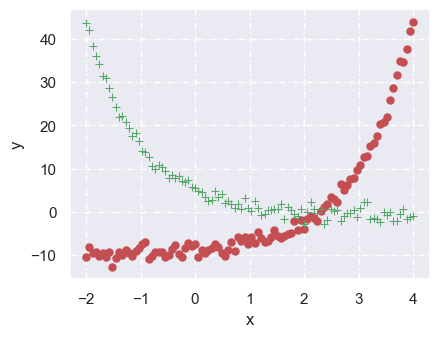

In [9]:
fig_1 = plt.figure(figsize=(4,3), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlabel('x') #This is how you add labels to the axes
axes_1.set_ylabel('y')
axes_1.scatter(pdf.x,pdf.y, color='r', lw=.05) #To plot the axes, and a label generated
axes_1.scatter(pdg.x,pdg.y,marker='+' , color='g', lw=.75) 
axes_1.grid(True, dashes=(5,2,1,2))

## Sumar componentes y's y graficar

In [10]:
df_suma= pdf.y+pdg.y
df_suma

0     33.239017
1     33.818099
2     28.938182
3     26.829525
4     23.833050
        ...    
95    34.389177
96    35.173566
97    36.163755
98    40.640143
99    43.080868
Name: y, Length: 100, dtype: float64

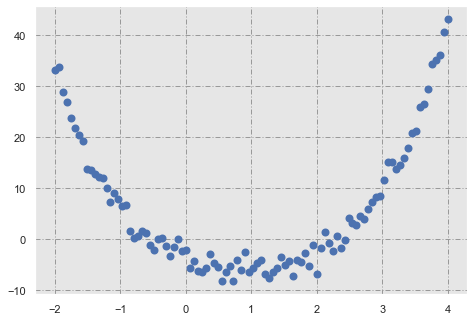

In [11]:
fig_suma = plt.figure(figsize=(6,4))
axes_suma = fig_suma.add_axes([0,0,1,1])
axes_suma.scatter(pdf.x, df_suma, lw=2) 

#Add a grid
axes_suma.grid(True, color='0.6', dashes=(5,2,1,2))

#Change the background color 
axes_suma.set_facecolor('.9')

## Ajustar una funcion cuadratica y encontrar coeficientes

In [12]:
## Ajustar una funcion quadratica a la suma
def f(t, a, b, c):
    return a*t**2 + b*t + c #curvefit

Para el ajuste de los datos al modelo cuadrático de regresión construímos la siguiente tabla, sin embargo se encontró un método más facil para encontrar los coeficientes, por lo cual ya no se continuo por este método.

In [23]:
df_ajustecuadratico_f = pd.DataFrame({'x': pdf.x, 'y': pdf.y, 'x^2': (pdf.x)**2, 'x^3': (pdf.x)**3, 'x^4': (pdf.x)**4,
                                    'x*y': pdf.x*pdf.y, 'x^2y':((pdf.x)**2)*pdf.y,'y^2': (pdf.y)**2})

df_ajustecuadratico_f

,x,y,x^2,x^3,x^4,x*y,x^2y,y^2
0,-2.000000,-10.561835,4.000000,-8.000000,16.000000,21.123670,-42.247339,111.552354
1,-1.939394,-8.231853,3.761249,-7.294543,14.146993,15.964807,-30.962049,67.763412
2,-1.878788,-9.534953,3.529844,-6.631828,12.459798,17.914154,-33.656895,90.915324
3,-1.818182,-9.241336,3.305785,-6.010518,10.928215,16.802428,-30.549870,85.402283
4,-1.757576,-10.319815,3.089073,-5.429279,9.542369,18.137857,-31.878658,106.498586
...,...,...,...,...,...,...,...,...
95,3.757576,35.020698,14.119376,53.054623,199.356767,131.592925,494.470384,1226.449269
96,3.818182,34.630118,14.578512,55.663411,212.533024,132.224086,504.855601,1199.245055
97,3.878788,37.781872,15.044995,58.356346,226.351887,146.547866,568.428087,1427.469831
98,3.939394,41.869477,15.518825,61.134764,240.833917,164.940363,649.765067,1753.053089


In [25]:
from scipy.optimize import curve_fit

pars, cov = curve_fit(f=f, xdata=pdf.x, ydata=df_suma)
pars

array([ 4.55037324, -7.95814614, -4.55137115])

## GRaficar promedios y matriz de covarianza

In [49]:
#Promedios

print(np.mean(pdf.x), np.mean(df_suma))


1.0000000000000002 5.9677558678500535


[[  3.06060606  18.92239326 -15.42534374]
 [ 18.92239326 175.79638699 -64.25691716]
 [-15.42534374 -64.25691716 118.2700784 ]]


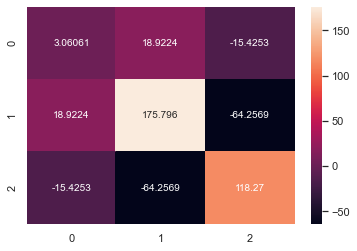

In [55]:
#Matriz de covarianza

data = np.array([pdf.x,pdf.y, pdg.y])
covMatrix = np.cov(data,bias=True)
print (covMatrix)
#heatmap

sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

[[  3.06060606   3.49704952]
 [  3.49704952 165.55263107]]


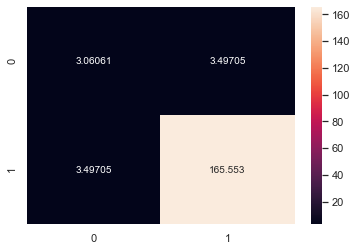

In [62]:
#Matriz de covarianza

data = np.array([pdf.x,df_suma])
covMatrix = np.cov(data,bias=True)
print (covMatrix)
#heatmap

sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

## Graficar mejor ajuste de la cuadratica

Se puede graficar por polinomios de distintos grados

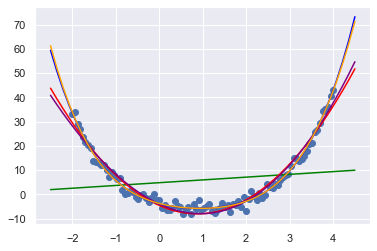

In [16]:
#fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(pdf.x, df_suma, 1))
model2 = np.poly1d(np.polyfit(pdf.x, df_suma, 2))
model3 = np.poly1d(np.polyfit(pdf.x, df_suma, 3))
model4 = np.poly1d(np.polyfit(pdf.x, df_suma, 4))
model5 = np.poly1d(np.polyfit(pdf.x, df_suma, 5))

#create scatterplot
polyline = np.linspace(-2.5, 4.5)
plt.scatter(pdf.x, df_suma)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')
plt.show()

Pero e mejor ajuste es con la función **fit_curve**, con la cual habíamos encontrado los coeficientes

(-15.0, 40.0)

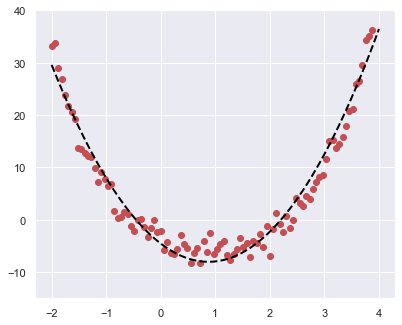

In [39]:
fig_ajuste = plt.figure(figsize=(5,4))
axes_ajuste = fig_ajuste.add_axes([0,0,1,1])

axes_ajuste.plot(pdf.x, f(pdf.x, *pars), linestyle='--', linewidth=2, color='black')
axes_ajuste.scatter(pdf.x, df_suma, color='r')

#Axis limits
axes_ajuste.set_ylim([-15,40])

O simplemente sustituímos  los coeficientes encontrados

(-15.0, 40.0)

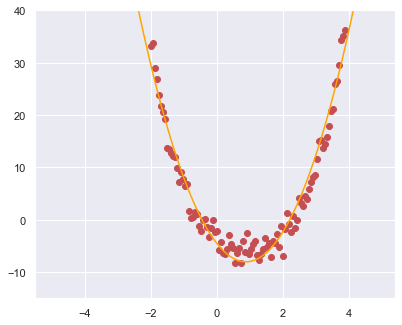

In [35]:
fig_ajuste = plt.figure(figsize=(5,4))
axes_ajuste = fig_ajuste.add_axes([0,0,1,1])

t= np.arange(-5,5,0.1)

axes_ajuste.plot(t,f(t,4.55037324, -7.95814614, -4.55137115), color='orange')
axes_ajuste.scatter(pdf.x, df_suma, color='r')

#Axis limits
axes_ajuste.set_ylim([-15,40])

## El mejor ajuste convertir a una funcion

## Encontrar raices

## Encontrar minimo

## Calcular derivadas en raices

## Graficar tangentes a raices y funcion 

## Graficar area entre parabola y tangentes

## Encotrar area total 

In [ ]:

area_total 